In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/ModerateDemented/moderateDem40.jpg
/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/ModerateDemented/moderateDem26.jpg
/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/ModerateDemented/30.jpg
/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/ModerateDemented/moderateDem48.jpg
/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/ModerateDemented/moderateDem37.jpg
/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/ModerateDemented/moderateDem22.jpg
/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/ModerateDemented/moderateDem36.jpg
/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/ModerateDemented/moderateDem1.jpg
/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/ModerateDemented/moderateDem45.jpg
/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/ModerateDemented/moderateDem31.jpg
/kaggle/input/augmented-alzheimer-mri-data

In [2]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [3]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Initialize lists for data and labels
data = []
labels = []

# Set the desired image height and width
img_height, img_width = 224, 224

# Directory containing the images
dataset_dir = '/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset'

# Iterate over each class directory (e.g., 'demented', 'non-demented')
for class_dir in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_dir)
    
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            
            # Check if the image was loaded successfully
            if img is None:
                print(f"Warning: Couldn't load image {img_path}")
                continue
            
            img = cv2.resize(img, (img_height, img_width))
            img = img.flatten()  # Flatten the image into a 1D array
            
            data.append(img)
            labels.append(class_dir)

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [4]:
# visualize data

import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' contains flattened image arrays and 'labels' contains corresponding class labels

# Choose a random image to display
random_index = np.random.randint(0, len(data))
image_to_display = data[random_index]
label_to_display = labels[random_index]

# Reshape the flattened image back to its original dimensions
image_to_display = image_to_display.reshape(img_height, img_width, -1)

# Display the image
plt.imshow(cv2.cvtColor(image_to_display, cv2.COLOR_BGR2RGB))
plt.title(f"Class: {label_to_display}")
plt.show()

In [5]:
# Count the number of images in each class
class_counts = {}
for label in labels:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

# Print the number of classes and their image counts
print("Number of classes:", len(class_counts))
for class_name, count in class_counts.items():
    print(f"Class '{class_name}': {count} images")

Number of classes: 4
Class 'ModerateDemented': 64 images
Class 'NonDemented': 3200 images
Class 'VeryMildDemented': 2240 images
Class 'MildDemented': 896 images


# Augmentation

In [6]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tensorflow import keras
import glob as gb
import pandas as pd
from tensorflow.keras.preprocessing import image_dataset_from_directory
#from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
#from tensorflow.keras.layers import Dense, Dropout, Flatten
#from tensorflow.keras.layers import Conv2D, MaxPool2D ,LeakyReLU
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, LeakyReLU

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


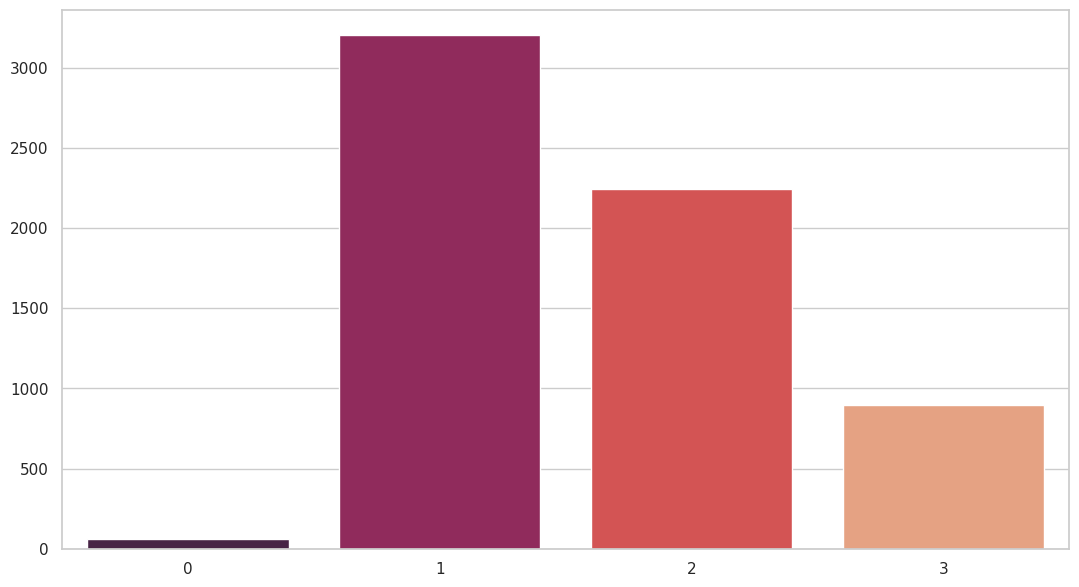

In [7]:
sns.set_theme(style="whitegrid")
Data_imbalance = []
for folder in os.listdir(dataset_dir):
    files = gb.glob(pathname=str(dataset_dir + "/" + folder +"/*.*"))
    Data_imbalance.append(len(files))
    
plt.figure(figsize=(13,7))
sns.barplot(x=[ "0", "1", "2","3"], y=Data_imbalance, palette="rocket")
plt.show()

In [8]:
total = 0
for i in range(0,len(Data_imbalance)) :
    total +=Data_imbalance[i]

weight_for_0 = (1 / Data_imbalance[0]) * (total / 4.0)
weight_for_1 = (1 / Data_imbalance[1]) * (total / 4.0)
weight_for_2 = (1 / Data_imbalance[2]) * (total / 4.0)
weight_for_3 = (1 / Data_imbalance[3]) * (total / 4.0)


class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print('Weight for class 2: {:.2f}'.format(weight_for_2))
print('Weight for class 3: {:.2f}'.format(weight_for_3))

Weight for class 0: 25.00
Weight for class 1: 0.50
Weight for class 2: 0.71
Weight for class 3: 1.79


In [9]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
])

In [14]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

In [15]:
train_dataset= (X_train, y_train)

In [16]:
import tensorflow as tf

# Assuming your original images are of shape (224, 224, 3)
image_shape = (224, 224, 3)

# Initialize data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
])

augmented_count = 0

# Loop through images and apply augmentation
for image, label in zip(X_train, y_train):
    # Reshape the flattened image back to its original dimensions
    image_reshaped = image.reshape(image_shape)
    
    # Expand dimensions to add the batch dimension
    image_batch = tf.expand_dims(image_reshaped, 0)  # Shape will be (1, 224, 224, 3)
    
    # Apply augmentation
    augmented_images = data_augmentation(image_batch)
    
    # Count the number of augmented images
    augmented_count += augmented_images.shape[0]

print(f"Total augmented images: {augmented_count}")


Total augmented images: 4480


In [17]:
original_count = len(train_dataset) * 32  # Total number of original images
total_count = original_count + augmented_count    # Total number of images after augmentation

increase_percentage = ((total_count - original_count) / original_count) * 100

print(f"Original image count: {original_count}")
print(f"Augmented image count: {augmented_count}")
print(f"Total image count after augmentation: {total_count}")
print(f"Increase in image count: {increase_percentage:.2f}%")
X_train.shape, y_train.shape

Original image count: 64
Augmented image count: 4480
Total image count after augmentation: 4544
Increase in image count: 7000.00%


((4480, 150528), (4480,))

# Oversampling

In [18]:
# Encode labels
#label_encoder = LabelEncoder()
#labels = label_encoder.fit_transform(labels)

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [19]:
import numpy as np
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Reshape data for oversampling
X_train_reshaped = np.array(X_train).reshape(len(X_train), -1)

# Apply oversampling to training data
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_reshaped, y_train)

# Reshape the oversampled data back to original shape
X_train_oversampled = X_train_oversampled.reshape(X_train_oversampled.shape[0], img_height, img_width, -1)

# Now you can use X_train_oversampled and y_train_oversampled for training your model

In [20]:
unique_classes, counts = np.unique(y_train_oversampled, return_counts=True)

print("Class indices:", unique_classes)
print("Label encoder classes:", label_encoder.classes_)

for class_index, count in zip(unique_classes, counts):
    if class_index >= len(label_encoder.classes_):
        print(f"Invalid class index: {class_index} (out of bounds)")
    else:
        class_name = label_encoder.classes_[class_index]
        print(f"Class '{class_name}': {count} samples")

Class indices: [0 1 2 3]
Label encoder classes: [0 1 2 3]
Class '0': 2226 samples
Class '1': 2226 samples
Class '2': 2226 samples
Class '3': 2226 samples


In [21]:
# Assuming X_train_oversampled has the shape (num_samples, height, width, channels)
num_samples, height, width, channels = X_train_oversampled.shape
num_samples,height,width,channels

(8904, 224, 224, 3)

In [22]:
# Reshape to 2D array where each image is flattened into a row
X_train_oversampled_flat = X_train_oversampled.reshape(num_samples, height * width * channels)

# Logistic Regression

In [23]:
# Now fit the Logistic Regression model
model_oversampled = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_oversampled.fit(X_train_oversampled_flat, y_train_oversampled)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [25]:
# Make predictions on the test set
y_pred_oversampled = model_oversampled.predict(X_test)

# Evaluate the model
accuracy_oversampled = accuracy_score(y_test, y_pred_oversampled)
print(f"Accuracy with Oversampling: {accuracy_oversampled * 100:.2f}%")

# Generate a classification report
print(classification_report(y_test, y_pred_oversampled, target_names=label_encoder.classes_))

Accuracy with Oversampling: 97.19%


TypeError: object of type 'numpy.int64' has no len()

In [26]:
from sklearn.metrics import confusion_matrix

cf_mtx = confusion_matrix(y_test, y_pred_oversampled)
cf_mtx

array([[250,   0,   4,   2],
       [  1,  17,   0,   5],
       [  1,   0, 961,  12],
       [  3,   0,  26, 638]])

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cf_mtx, display_labels=label_encoder.classes_)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 7))
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Customize label styles
ax.set_xticklabels(disp.display_labels, fontsize=12, color='red', rotation=45)
ax.set_yticklabels(disp.display_labels, fontsize=12, color='blue', rotation=45)

plt.title("Customized Confusion Matrix", fontsize=16)
plt.show()

# OnetoOne SVM

In [28]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

# Initialize the SVM model
svm_model = SVC(kernel='linear')  # we can choose different kernels like 'rbf', 'poly', etc.

In [29]:
# Create the One-vs-One classifier
ovo_classifier = OneVsOneClassifier(svm_model)

In [30]:
# Fit the model to the training data
ovo_classifier.fit(X_train_oversampled_flat, y_train_oversampled)

OneVsOneClassifier(estimator=SVC(kernel='linear'))

In [31]:
# Make predictions on the test set
y_pred_ovo = ovo_classifier.predict(X_test)

# Evaluate the model
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)
print(f"Accuracy with Oversampling: {accuracy_ovo * 100:.2f}%")

# Generate a classification report
print(classification_report(y_test, y_pred_ovo, target_names=label_encoder.classes_))

Accuracy with Oversampling: 97.81%


TypeError: object of type 'numpy.int64' has no len()

In [32]:
from sklearn.metrics import confusion_matrix

cf_mtx_ovo = confusion_matrix(y_test, y_pred_ovo)
cf_mtx_ovo

array([[254,   0,   1,   1],
       [  0,  20,   0,   3],
       [  0,   0, 960,  14],
       [  0,   0,  23, 644]])

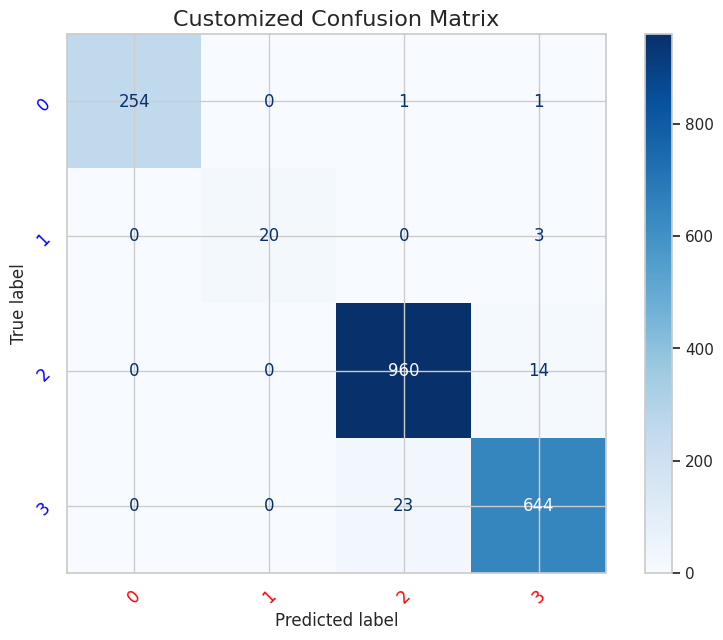

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp_ovo = ConfusionMatrixDisplay(confusion_matrix=cf_mtx_ovo, display_labels=label_encoder.classes_)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 7))
disp_ovo.plot(cmap=plt.cm.Blues, ax=ax)

# Customize label styles
ax.set_xticklabels(disp_ovo.display_labels, fontsize=12, color='red', rotation=45)
ax.set_yticklabels(disp_ovo.display_labels, fontsize=12, color='blue', rotation=45)

plt.title("Customized Confusion Matrix", fontsize=16)
plt.show()

**Random forest**

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_oversampled_flat, y_train_oversampled)

RandomForestClassifier(random_state=42)

In [35]:
y_pred_rf = rf_model.predict(X_test)

In [36]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy with Oversampling: {accuracy_rf * 100:.2f}%")

# Generate a classification report
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

Accuracy with Oversampling: 94.27%


TypeError: object of type 'numpy.int64' has no len()

In [37]:
from sklearn.metrics import confusion_matrix

cf_mtx_rf = confusion_matrix(y_test, y_pred_rf)
cf_mtx_rf

array([[230,   0,   8,  18],
       [  0,  15,   3,   5],
       [  0,   0, 956,  18],
       [  1,   0,  57, 609]])

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cf_mtx_rf, display_labels=label_encoder.classes_)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 7))
disp_rf.plot(cmap=plt.cm.Blues, ax=ax)

# Customize label styles
ax.set_xticklabels(disp_rf.display_labels, fontsize=12, color='red', rotation=45)
ax.set_yticklabels(disp_rf.display_labels, fontsize=12, color='blue', rotation=45)

plt.title("Customized Confusion Matrix", fontsize=16)
plt.show()